# Processing with biomass data of other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/1_Estimation of tree biomass/FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(biomass_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,RS(P),BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,0.35,9.7,43.9,18.9,NaN,NaN,8.4,1.6
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,0.70,32.2,254.0,113.1,NaN,NaN,11.5,4.1
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,0.93,35.2,190.0,87.8,NaN,NaN,13.7,4.1
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,0.62,29.6,277.7,106.5,NaN,NaN,14.4,5.4
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,0.59,20.4,142.5,67.0,NaN,NaN,14.2,3.4


In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',
                                    'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
                                    'Crown_t_ha','Foliage_t_ha'])
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Groups,Species_ID,Origin_ID,SI,A_years,H_m,DBH_cm,RS(P),BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha
0,1,0,0.0,4,50,9.7,14.6,0.35,9.7,43.9,18.9,NaN,NaN,8.4,1.6
1,1,0,0.0,2,65,20.6,20.6,0.70,32.2,254.0,113.1,NaN,NaN,11.5,4.1
2,1,0,0.0,2,50,13.6,15.4,0.93,35.2,190.0,87.8,NaN,NaN,13.7,4.1
3,1,0,0.0,1,60,23.3,22.2,0.62,29.6,277.7,106.5,NaN,NaN,14.4,5.4
4,1,0,0.0,3,65,15.6,16.4,0.59,20.4,142.5,67.0,NaN,NaN,14.2,3.4


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Groups          857 non-null    int64  
 1   Species_ID      857 non-null    int64  
 2   Origin_ID       856 non-null    float64
 3   SI              857 non-null    int64  
 4   A_years         857 non-null    int64  
 5   H_m             857 non-null    float64
 6   DBH_cm          856 non-null    float64
 7   RS(P)           854 non-null    float64
 8   BA_sq_m_ha      857 non-null    float64
 9   GS_cub_m        857 non-null    float64
 10  ALL_STEM_t_ha   855 non-null    float64
 11  Stem_wood_t_ha  747 non-null    float64
 12  Stem_bark_t_ha  747 non-null    float64
 13  Crown_t_ha      843 non-null    float64
 14  Foliage_t_ha    854 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 100.6 KB


In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species","Origin"])["BA_sq_m_ha","H_m"].describe()

<ipython-input-5-aaa965077f06>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Species","Origin"])["BA_sq_m_ha","H_m"].describe()


BA_sq_m_ha                                                     \
                    count       mean        std   min     25%    50%     75%   
Species Origin                                                                 
Alder   a            11.0  27.854545   7.162173  20.6  22.050  28.70  31.250   
        n           104.0  26.243269   9.595284   7.3  18.400  25.65  34.100   
Aspen   n            66.0  23.056061   8.684011   6.9  16.550  20.65  28.125   
Birch   a            29.0  21.127586   8.611201   4.4  12.900  21.90  24.700   
        n            90.0  17.817778   7.397397   3.8  12.150  18.35  23.050   
Oak     a             4.0  25.325000   8.932105  17.8  18.475  23.35  30.200   
        n            87.0  27.529885  10.769446   1.7  20.350  30.10  36.300   
Pine    a           195.0  30.469231  10.685416   4.7  23.250  31.10  38.200   
        n           263.0  27.171863  10.774800   1.0  20.500  28.90  35.000   
Spruce  n             7.0  25.028571   7.756656  15.5  18.050  26.80  31.350   

                        H_m                                                   \
                 max  count       mean       std   min     25%    50%    75%   
Species Origin                                                                 
Alder   a       43.4   11.0  20.236364  4.157950  15.4  16.000  21.00  22.90   
        n       43.0  104.0  17.056731  4.874339   5.2  13.100  17.40  20.50   
Aspen   n       48.9   66.0  15.024242  6.264161   2.7  10.325  15.30  19.30   
Birch   a       46.3   29.0  16.320690  7.002162   3.6   9.900  19.40  21.20   
        n       36.5   90.0  14.726667  5.990551   5.8   9.200  14.25  19.35   
Oak     a       36.8    4.0  19.350000  4.792703  13.6  16.900  19.40  21.85   
        n       48.1   87.0  20.870115  7.211427   5.0  15.800  21.60  26.00   
Pine    a       51.5  195.0  16.259487  7.553524   3.5  10.350  15.10  21.95   
        n       51.1  263.0  15.555513  7.296750   1.5  10.700  15.20  20.10   
Spruce  n       34.1    7.0  19.357143  8.967507   8.8  12.150  19.40  24.90   

                      
                 max  
Species Origin        
Alder   a       27.3  
        n       27.3  
Aspen   n       26.0  
Birch   a       26.5  
        n       27.5  
Oak     a       25.0  
        n       33.8  
Pine    a       34.2  
        n       38.3  
Spruce  n       33.2

In [6]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = ["Stem_bark_t_ha"], inplace=True) # IMPOTANT - input name of column
print(select)

     Groups  Species_ID  Origin_ID  SI  A_years   H_m  DBH_cm  RS(P)  \
10        1           5        0.0   2       60  18.2    19.6   0.59   
11        1           1        0.0   2       27   8.8     5.2   0.80   
12        1           1        0.0   2       30  10.2     6.7   0.70   
13        1           1        0.0   1       35  14.1    10.0   0.60   
14        1           1        0.0   1       51  19.4    15.9   0.60   
..      ...         ...        ...  ..      ...   ...     ...    ...   
852       2           3        0.0   0        8   7.8     4.4   0.71   
853       2           3        0.0   0       16  12.7     9.0   0.97   
854       2           3        0.0   0       15  12.2     8.1   0.99   
855       2           2        0.0   2       21  14.3    12.4   1.08   
856       2           2        0.0   1       66  21.1    25.6   0.71   

     BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  Stem_wood_t_ha  Stem_bark_t_ha  \
10         18.3     159.0          101.8            85.4   

In [7]:
# Descriptive statistics of main parameters
select.describe()

,Groups,Species_ID,Origin_ID,SI,A_years,H_m,DBH_cm,RS(P),BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha
count,747.000000,747.000000,746.000000,747.000000,747.000000,747.000000,746.000000,744.000000,747.000000,747.000000,747.000000,747.000000,747.000000,745.000000,745.000000
mean,1.429719,1.601071,0.305630,0.781794,45.219545,16.760241,17.355630,0.887890,26.416867,233.451138,104.837483,92.779518,12.060107,13.879839,4.707289
std,0.495368,1.779809,0.460983,1.631391,33.002396,7.012252,10.599985,0.287997,10.524352,144.905761,69.435310,61.992238,9.595428,11.825459,2.833416
min,1.000000,0.000000,0.000000,-4.000000,2.000000,1.500000,1.100000,0.250000,1.000000,7.900000,2.400000,2.000000,0.300000,0.610000,0.330000
25%,1.000000,0.000000,0.000000,0.000000,23.000000,11.700000,9.900000,0.720000,19.000000,117.900000,50.650000,42.900000,5.950000,6.460000,2.530000
50%,1.000000,1.000000,0.000000,1.000000,37.000000,16.500000,15.800000,0.875000,26.800000,214.000000,96.600000,84.600000,9.300000,10.640000,4.300000
75%,2.000000,3.000000,1.000000,2.000000,58.000000,21.450000,22.400000,1.000000,34.250000,329.300000,141.700000,125.500000,15.300000,16.630000,6.300000
max,2.000000,5.000000,1.000000,7.000000,250.000000,36.100000,94.000000,2.320000,51.500000,700.000000,363.900000,315.200000,65.700000,69.120000,21.730000


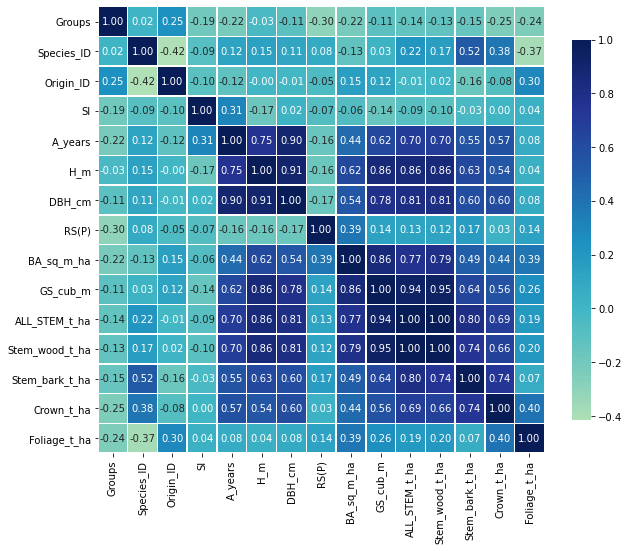

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha'])
y = pd.DataFrame(select, columns= ['Stem_bark_t_ha'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_value = np.random.normal(10, 2, size=count)
    X['Random_col'] = norm_value
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [11]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [12]:
# Columns in "y" data collections
y.head()

,Stem_bark_t_ha
10,16.4
11,8.3
12,9.1
13,18.8
14,35.7


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=4, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.9199300255790457, 0.9344921458474877, 0.7998520254282516, 0.8336208518059562]
    Mean: 0.872
    Std: 0.057

 --------------------
Root-mean-square error (RMSE): 

    Scores: [3.05480501 4.00679747 3.49230727 2.75019189]
    Mean: 3.326
    Std: 0.473

 --------------------
Mean absolute error (MAE): 

    Scores: [2.027834218230477, 1.9522006788355781, 2.294387946759953, 2.047921000533206]
    Mean: 2.081
    Std: 0.128

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=2000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y, eval_metric="rmse")

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Model with rank: 1
Mean validation score: 0.721 (std: 0.085)
Parameters: {'colsample_bytree': 0.6618637554923994, 'gamma': 0.17264037949538136, 'learning_rate': 0.24268238044305301, 'max_depth': 3, 'n_estimators': 76, 'subsample': 0.6733615714796921}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.28326488, 0.25299797, 0.57443495, ..., 0.72793403, 0.5064496 ,
       0.3239861 ]), 'std_fit_time': array([0.02525325, 0.01119969, 0.19593785, ..., 0.08702983, 0.00169379,
       0.03908036]), 'mean_score_time': array([0.01092978, 0.01092243, 0.0114161 , ..., 0.01184769, 0.01172938,
       0.01176219]), 'std_score_time': array([1.24388436e-03, 4.85553634e-04, 1.66918767e-03, ...,
       1.06055959e-04, 1.71094860e-05, 2.00818088e-05]), 'param_colsample_bytree': masked_array(data=[0.907718302841832, 0.1468179394139607,
                   0.33845511389535726, ..., 0.24646021510308636,
                   0.3519308129771324, 0.6141401424888119],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.3290378089488186, 0.28005460895277223,
                   0.0633351464432157, ..., 0.19531663863346127,
                   0.02225239868808515, 0.01210142915077922],
    

In [20]:
# Overwrite parameter data for the next step/stage
p1 = 0.6618637554923994     # colsample_bytree 
p2 = 0.17264037949538136    # gamma
p3 = 0.24268238044305301    # learning_rate
p4 = 3                      # max_depth
p5 = 76                    # n_estimators
p6 = 0.6733615714796921     # subsample

# Creating a basic XGBoost model

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [22]:
# Generate test and training samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
# Implementation of the scikit-learn API for XGBoost regression
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [24]:
# Show all parameters of XGBoost model
print(xgb_model)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6618637554923994,
             enable_categorical=False, eval_metric=['rmse'],
             gamma=0.17264037949538136, gpu_id=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.24268238044305301,
             max_delta_step=None, max_depth=3, min_child_weight=None,
             missing=nan, monotone_constraints=None, n_estimators=76,
             n_jobs=None, num_parallel_tree=None, predictor=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=0.6733615714796921,
             tree_method=None, validate_parameters=None, verbosity=None)


In [25]:
# Fitting the model 
xgb_model.fit(X_train, y_train, early_stopping_rounds=200, eval_set=[(X_train, y_train), (X_test, y_test)])
# learning dynamics
y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)

[0]	validation_0-rmse:12.02326	validation_1-rmse:11.75649
[1]	validation_0-rmse:9.70588	validation_1-rmse:9.45316
[2]	validation_0-rmse:7.88831	validation_1-rmse:7.63844
[3]	validation_0-rmse:6.65206	validation_1-rmse:6.24586
[4]	validation_0-rmse:5.74611	validation_1-rmse:5.36238
[5]	validation_0-rmse:5.06332	validation_1-rmse:4.60934
[6]	validation_0-rmse:4.53401	validation_1-rmse:4.17813
[7]	validation_0-rmse:4.17199	validation_1-rmse:3.83960
[8]	validation_0-rmse:3.88371	validation_1-rmse:3.57967
[9]	validation_0-rmse:3.71019	validation_1-rmse:3.45901
[10]	validation_0-rmse:3.59625	validation_1-rmse:3.40655
[11]	validation_0-rmse:3.48516	validation_1-rmse:3.34825
[12]	validation_0-rmse:3.41896	validation_1-rmse:3.30856
[13]	validation_0-rmse:3.35213	validation_1-rmse:3.26327
[14]	validation_0-rmse:3.27557	validation_1-rmse:3.27627
[15]	validation_0-rmse:3.19123	validation_1-rmse:3.25144
[16]	validation_0-rmse:3.14192	validation_1-rmse:3.22988
[17]	validation_0-rmse:3.04333	validati

/home/dima/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [26]:
# Iteration with the best result
optimal_n= xgb_model.best_ntree_limit-1
print("The best iteration: " + str(optimal_n))    

The best iteration: 67


In [27]:
# Preparing data for building a learning graph
results = xgb_model.evals_result()

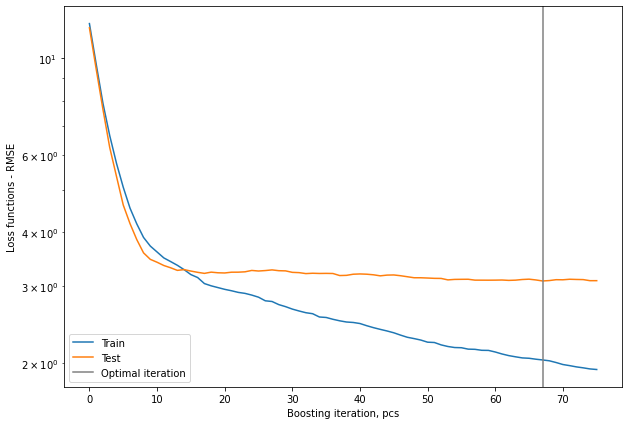

In [28]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(results['validation_0']['rmse'], label='Train')
plt.plot(results['validation_1']['rmse'], label='Test')
plt.axvline(optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a basic XGBoost model

In [29]:
# Convert data to 'array' type
conv_y_pred = pd.DataFrame(y_pred) # Double transformation
y_pred2 = conv_y_pred.values
y_test2 = y_test.values

# Intermediate results
n_sample = len(y_pred2)
main_sample = y_test.sum() / n_sample

# Calculation of bias
diff = y_pred2 - y_test2
bias = diff.sum()
print('Bias: %.1f' % (bias/n_sample))
print("Relative bias(%):", " %.2f" % (bias/main_sample))

# Calculation of RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %.1f" % (rmse))
print("Relative RMSE(%):", " %.3f" % (rmse/main_sample))

# Calculation of MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.1f" % (mse))

# Calculation of Square R
R_square = r2_score(y_test, y_pred)
print("R square: %.1f%%" % (R_square * 100.0))

Bias: -0.2
Relative bias(%):  -1.89
RMSE: 3.1
Relative RMSE(%):  0.248
MSE: 9.5
R square: 88.9%


In [30]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [31]:
# Convert input data
x_test_conv = np.array(y_test)
x_test_convert = np.array([None]*n_sample)
for i in range(n_sample):
    x_test_convert[i] = np.float(x_test_conv[i])

x_plot = x_test_convert
y_plot = y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.618
a1: 0.938
R^2: 0.892
Uncertainty
a0: 0.6+/-0.4
a1: 0.938+/-0.027


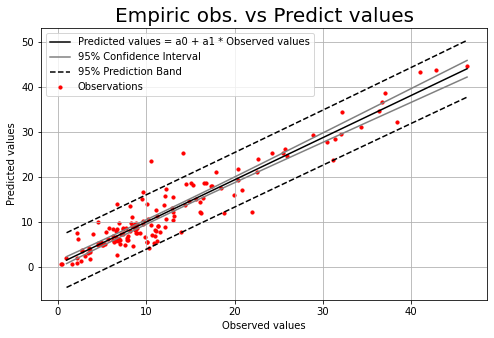

In [32]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

/home/dima/anaconda3/lib/python3.8/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


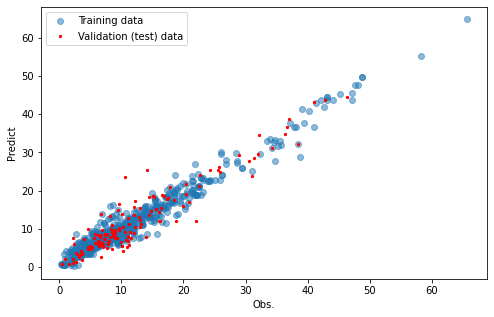

In [33]:
# Comparison of training and testing prediction values for XGBoost model 
y_pred_train = xgb_model.predict(X_train, ntree_limit=xgb_model.best_ntree_limit)

plt.figure(figsize =(8, 5))
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Training data')
plt.scatter(y_test, y_pred, s = 5, c = "red", label='Validation (test) data')
plt.xlabel('Obs.')
plt.ylabel('Predict')
plt.legend(loc='best')

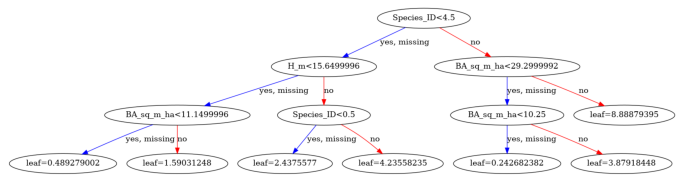

In [35]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(xgb_model,num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

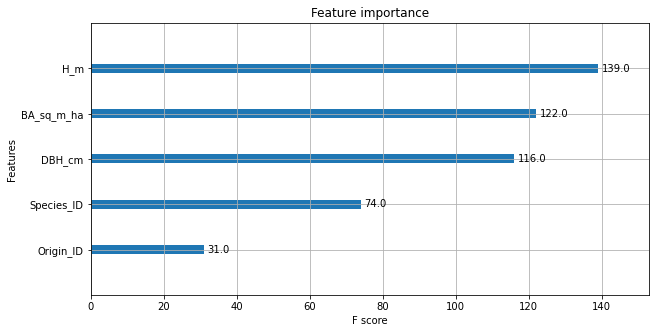

In [37]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

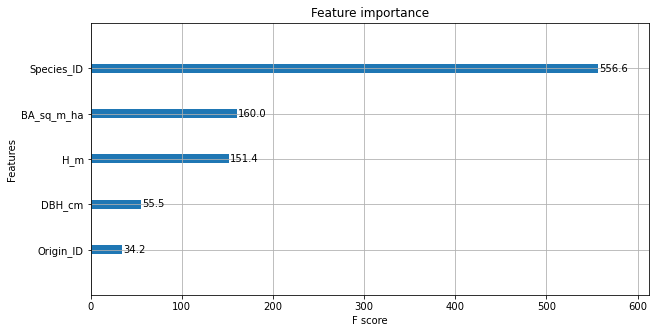

In [38]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

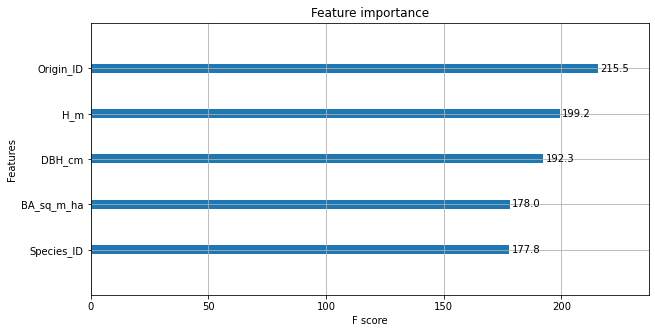

In [39]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [40]:
# Load SHAP`s library
import shap

In [41]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


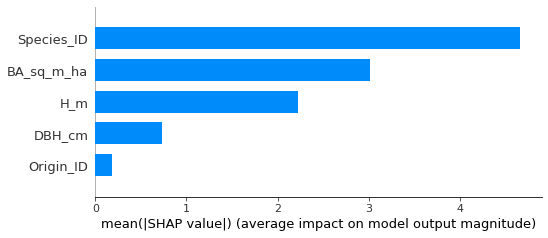

In [42]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, X_train, plot_type="bar")

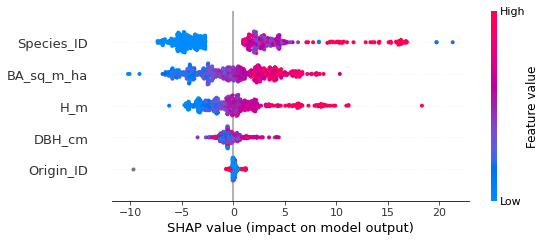

In [43]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, X_train)

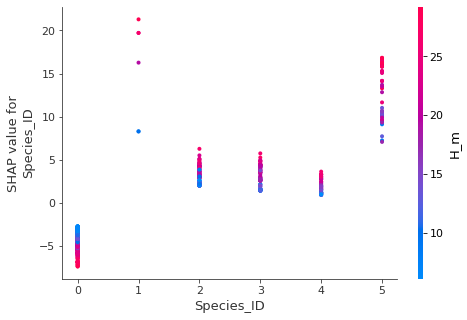

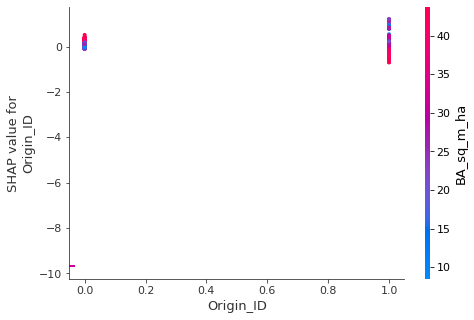

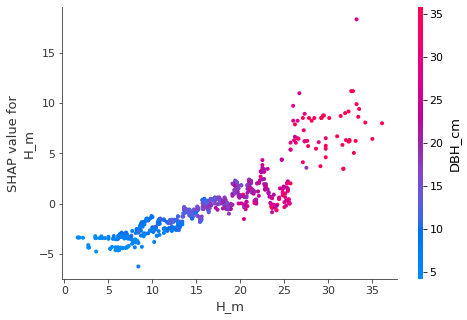

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


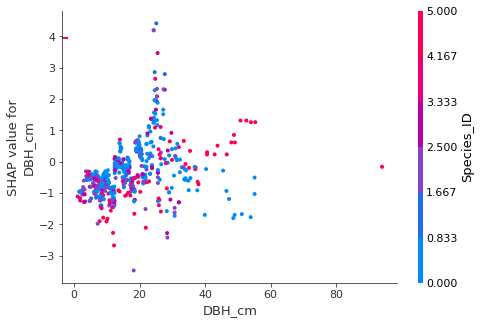

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


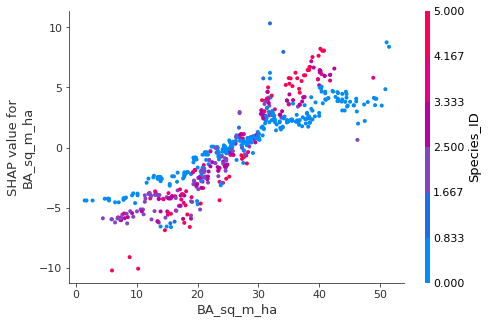

In [44]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train, color=shap_values)

# Testing model on new data

In [55]:
# Load new data (typing)
sp = input('Typing species name - Pine, Spruce, Birch, Alder, Aspen or Oak:')
if sp == 'Pine':
    sdID = 0
    print ('You typed "Pine".')
elif sp == 'Spruce':
    sdID = 1
    print ('You typed "Spruce".')
elif sp == 'Birch':
    sdID = 2
    print ('You typed "Birch".')
elif sp == 'Alder':
    sdID = 3
    print ('You typed "Alder".')
elif sp == 'Aspen':
    sdID = 4
    print ('You typed "Aspen".')
elif sp == 'Oak':
    sdID = 5
    print ('You typed "Oak".')
elif sp != 'Pine' or 'Spruce' or 'Birch' or 'Alder' or 'Aspen' or 'Oak':
    print ('No correctly specie name!')
else:
    print('\nTyping mistake!!!')

ori = input('Typing origin: n - nutural, a - artificial:')
if ori == 'n':
    orID = 0
    print ('You typed "n".')
elif ori == 'a':
    orID = 1
    print ('You typed "a".')
else:
    print('\nTyping mistake!!!')
    
dbh = float(input('Typing DBH (cm):'))

h = float(input('Typing H (m):'))

ba = float(input('Typing BA(or G) (sq.m/ha):'))

# Create new dataframe
new_data = []
new_data.append([sdID, orID, h, dbh, ba])
new_X = pd.DataFrame(new_data, columns=['Species_ID', 'Origin_ID', 'H_m', 'DBH_cm', 'BA_sq_m_sq_m'])

# Present the result based on the entered data
y_pred_new = xgb_model.predict(new_X)
out0 = str(y_pred_new)
out = out0[1:6]
print('\n', 20*'-', '\n Output result: ' + out)

Typing species name - Pine, Spruce, Birch, Alder, Aspen or Oak: Spruce


You typed "Spruce".


Typing origin: n - nutural, a - artificial: a


You typed "a".


Typing DBH (cm): 35
Typing H (m): 35
Typing BA(or G) (sq.m/ha): 40



 -------------------- 
 Output result: 53.16


# Save XGBoost model

In [57]:
# Save to JSON
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/1_Estimation of tree biomass/xgb_model_M_stem_bark.json")
# Save to text format
xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/1_Estimation of tree biomass/xgb_model_M_stem_bark.txt")